<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_VisualizacionDeDatos/blob/main/VDD_%7C_Trabajo_final_Carolina_Herrera_Azolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instrucciones
Resumen

¡Bienvenido(a)!

Te invitamos a realizar la tarea final del curso Visualización de datos.

●	Objetivo: Crear visualización de texto o espacio-temporal validada con modelo anidado de Munzner.

●	Tipo de actividad: Individual.

●	Tipo de evaluación: Sumativa (con calificación).

●	Ponderación: 15%

●	Puntaje: 44 puntos.

●	Calificación: Exigencia de 50%.



1. Antes de comenzar, debes haber revisado todas las clases y tutoriales del curso.

2. Descarga el dataset  adjunto, mismo que se utilizó en la tarea anterior (semana 6), donde cada columna es una medición al vino y existe una columna de "calidad".

3. Para la primera parte de esta tarea, deberás cargar el set de datos y generar los siguientes gráficos, procurando tomar las decisiones correctas para generar visualizaciones de calidad. Las columnas a usar en cada gráfico son a elección propia, las que deben ser  explicitadas:  

a.	Un histograma para comparar una columna.

b.	Un gráfico de burbujas para comparar 4 columnas.

c.	Un gráfico de dispersión para 2 columnas.

d.	Una matriz de gráficos de dispersión para comparar un conjunto de 4 columnas.

e.	Un gráfico de densidad para una columna, que separe los datos en vinos de buena calidad (calidad sobre 5) de mala calidad (bajo 5).

f.	Un gráfico de torta que muestre la cantidad de vinos de cada calidad.

g.	Un small múltiples de histogramas, separados por calidad.

h.	Un gráfico de violín donde se separe una columna en cuartiles y se grafique esta separación junto con la separación de vinos de buena y mala calidad (gráfico de violín con dos variables categóricas).

4. Para la segunda parte de esta tarea, deberás crear una visualización de nube de palabras con el contenido de una página de wikipedia a elección propia. Esta visualización debe mostrarse primero en forma de rectángulo (la que viene por defecto) y luego debe mostrarse usando una máscara hecha  por ustedes mismos, la cual NO puede ser simplemente un polígono o un círculo. Los datos usados para esta sección deben ser obtenidos usando la librería adecuada y no pueden ser puestos directamente en su código (hardcoding).

Una vez finalizada la actividad, guarda el archivo con extensión .ipynb, con el nombre “Tarea 4_Nombre y Apellidos” y súbelo a la plataforma siguiendo las siguientes instrucciones:

Haz clic en el botón para agregar entrega. Se abrirá una nueva ventana que permite arrastrar el archivo y subirlo.
Comprueba que el archivo arrastrado es el correcto y presiona el botón para guardar cambios. El documento quedará guardado en la plataforma.


In [4]:
# Importar el módulo pyplot de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Importar el dataset de imágenes de dígitos
from sklearn.datasets import load_digits, load_iris

# Importar las librerías con los métodos de reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
wine_data = pd.read_csv("winequality.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**a. Un histograma para comparar una columna.**
- Respuesta: Se seleccionó el nivel de alcohol como base de la comparación, dado que es un atributo altamente relacionado con el consumo de vino. Como se puede observar en el gráfico, a mayor grado de alcohol, disminuye la cantidad de vinos, lo cual podría estar relacionado con la calidad y el precio de estos productos de nicho. En contraste, la mayor parte de los vinos se concentra en el rango de 9% a 10% de alcohol, lo que sugiere una mayor producción y consumo en este segmento. Esta tendencia está respaldada por la asimetría de la gráfica, que muestra un predominio de vinos con contenido moderado de alcohol.

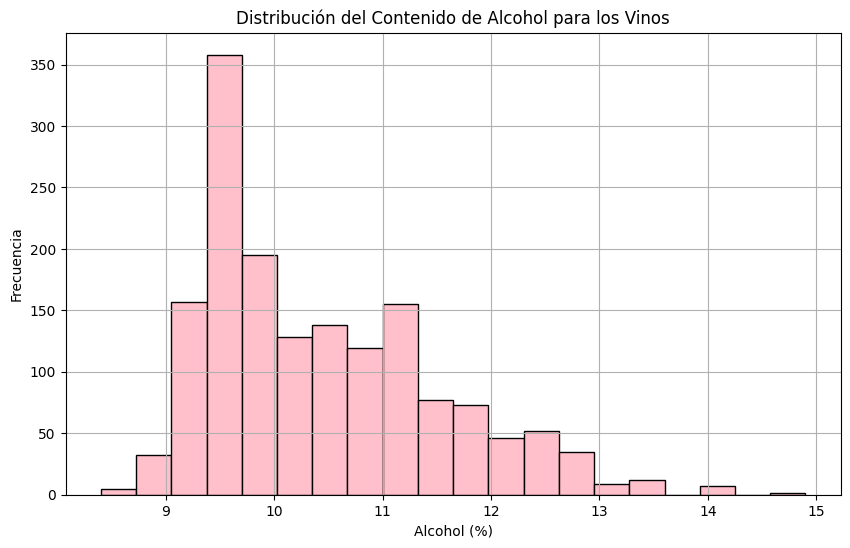

In [9]:
# Generar un histograma para la columna 'alcohol'
plt.figure(figsize=(10, 6))
plt.hist(wine_data['alcohol'], bins=20, color='pink', edgecolor='black')
plt.title('Distribución del Contenido de Alcohol para los Vinos')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

b.	Un gráfico de burbujas para comparar 4 columnas.
- Respuesta:
Se comparó la relación entre los tipos de acidez (fija y volátil) con respecto al contenido de dióxido de azufre y la calidad.
Guiados por la gráfica desprendemos que a mayor calidad de vino (burbujas más oscuras) se tiene un comportamiento más estable con respecto a las acideces y a su vez, que para las concentraciones más altas de dioxido de azufre se encuentran en rangos inferiores de acidez (burbujas más grandes)
 lo que da señales sobre una correlación entre estos atributos y producción de vinos.

<ipython-input-22-9a2427952ef4>:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Calidad del Vino')


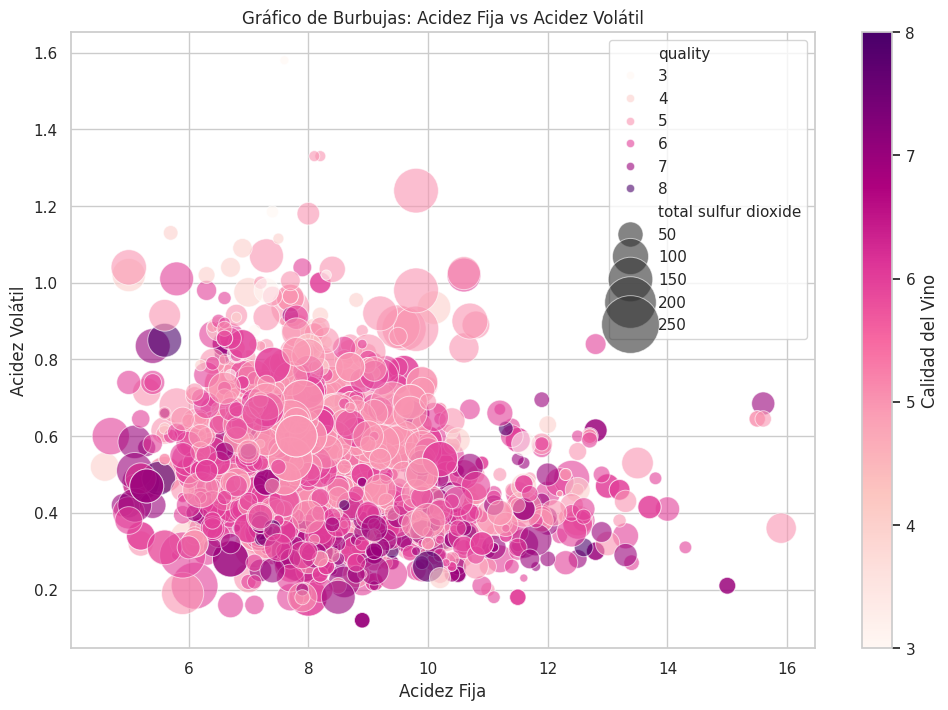

In [22]:
sns.set(style="whitegrid")
palette = sns.color_palette("RdPu", as_cmap=True)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=wine_data, x='fixed acidity', y='volatile acidity',
                          size='total sulfur dioxide', sizes=(20, 2000),
                          hue='quality', palette='RdPu', legend='brief', alpha=0.6)


norm = plt.Normalize(wine_data['quality'].min(), wine_data['quality'].max())
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Calidad del Vino')

plt.title('Gráfico de Burbujas: Acidez Fija vs Acidez Volátil')
plt.xlabel('Acidez Fija')
plt.ylabel('Acidez Volátil')
plt.grid(True)
plt.show()


c.	Un gráfico de dispersión para 2 columnas.
- Respuesta: Se elige para el análisis los atributos de acidez y el PH, donde se observa una correlación negativa, dado que que a mayor acidez se tiene un ph más bajo, donde tiene lógica puesto a que son caractisticas propias del producto.
  La mayor parte de los vinos en el conjunto de datos se concentra en un rango de acidez moderada y pH bajo, lo que refleja un aspecto de los gustos y preferencias de los clientes que guían a la producción vinicola.

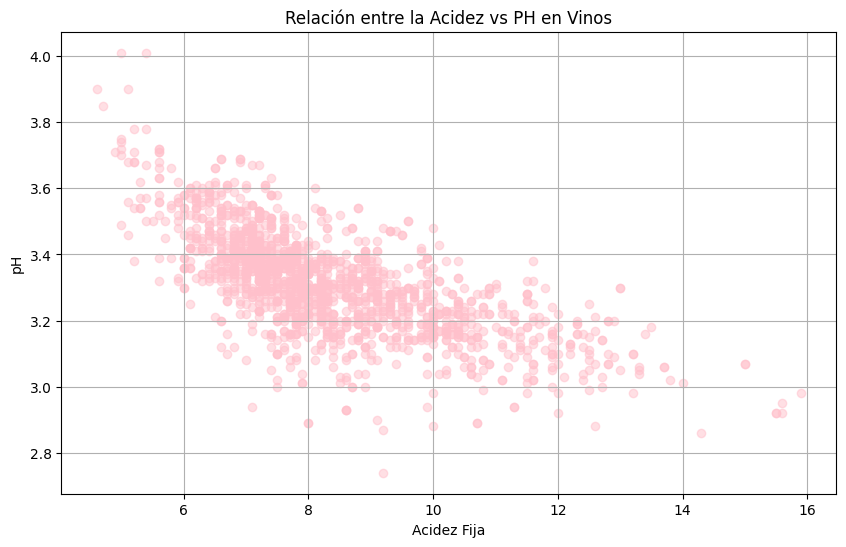

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(wine_data['fixed acidity'], wine_data['pH'], color='pink', alpha=0.5)
plt.title('Relación entre la Acidez vs PH en Vinos')
plt.xlabel('Acidez Fija')
plt.ylabel('pH')
plt.grid(True)
plt.show()

d.	Una matriz de gráficos de dispersión para comparar un conjunto de 4 columnas.
- Respuesta:
Con la información obtenida por los gráficos pudimos divisar la relación entre acidez fija y ph, donde se muestra una relación inversa. Por otro lado, el nivel de alcohol muesta ser independiente de otras variables lo que indica que no va tan relacionado con las caracteristicas de acidez.



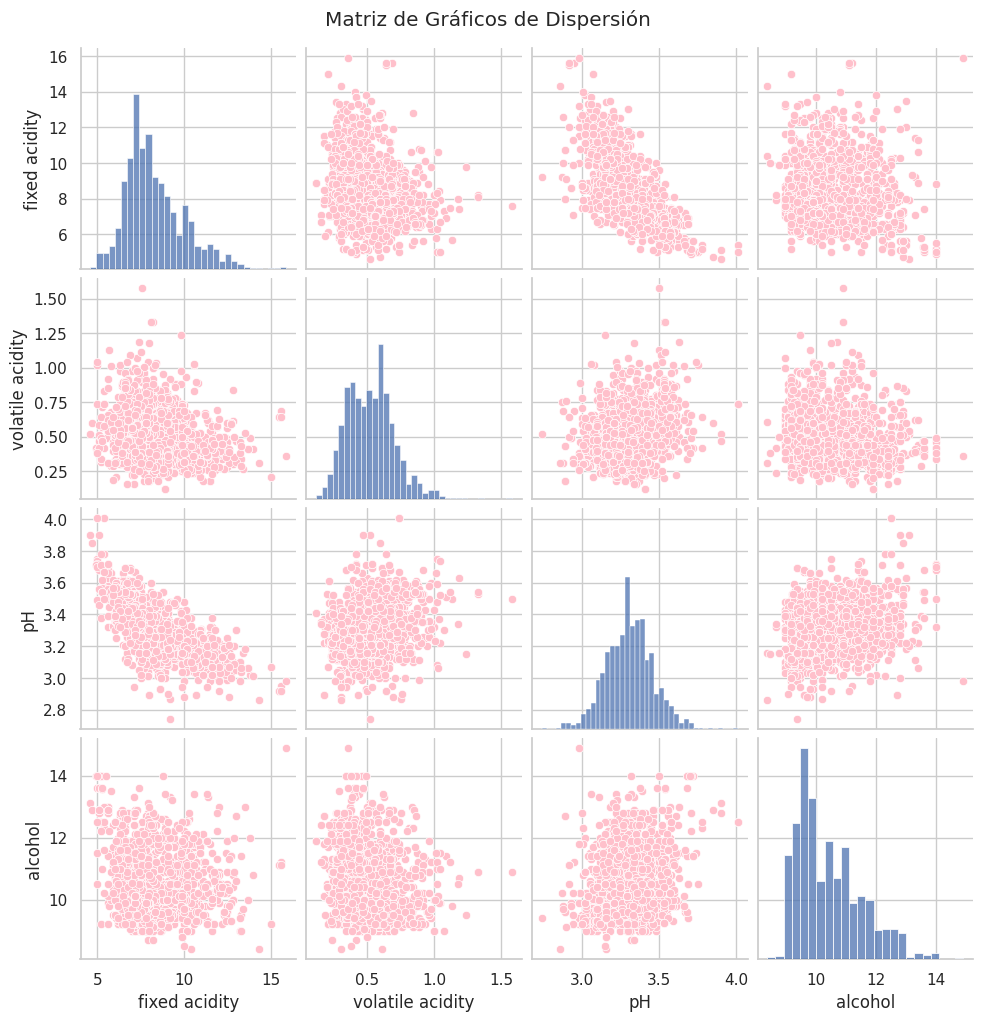

In [40]:
p4 = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
sns.pairplot(wine_data[p4], plot_kws={'color': 'pink'})
plt.suptitle('Matriz de Gráficos de Dispersión ', y=1.02)
plt.show()


e. Un gráfico de densidad para una columna, que separe los datos en vinos de buena calidad (calidad sobre 5) de mala calidad (bajo 5).
- Respuesta: Guiandonos por la distribución en el comportamiento de los vinos de baja calidad encontramos que se encuentran en una mayor concentración en el rango de 9% al 10% y su conformación es en un menor nivel de alcohol. Por otro lado, los vinos de alta calidad se encuentran distribuidos en un rango mayor, donde desprendemos que cuentan con un mayor grado de alcohol.
Ambos tipos de vino comparten un segmento superpuesto, ubicado en el rango de 9% a 10%, donde concluimos que en este nivel de alcohol no logra ser un determinante de la calidad del vino, pero si del nivel del consumo.


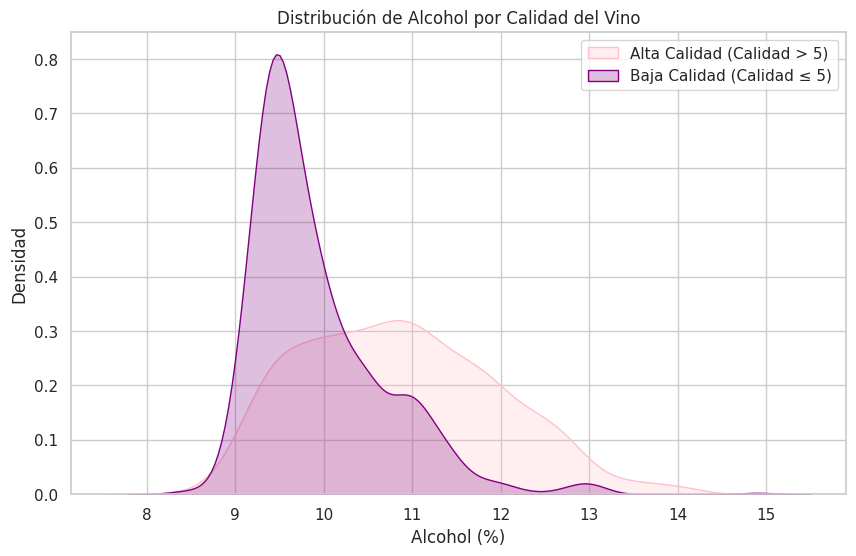

In [27]:
alta_calidad = wine_data[wine_data['quality'] > 5]['alcohol']
baja_calidad = wine_data[wine_data['quality'] <= 5]['alcohol']

plt.figure(figsize=(10, 6))
sns.kdeplot(alta_calidad, label='Alta Calidad (Calidad > 5)', color='pink', fill=True)
sns.kdeplot(baja_calidad, label='Baja Calidad (Calidad ≤ 5)', color='purple', fill=True)
plt.title('Distribución de Alcohol por Calidad del Vino')
plt.xlabel('Alcohol (%)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


f.	Un gráfico de torta que muestre la cantidad de vinos de cada calidad.
- Respuesta: Dado el siguiente gráfico, desprendemos que más del 80% de  los vinos se encuentran en el rango de calidad 5 y 6. Por otro lado, los vinos de calidad muy alta (7 y 8) y muy baja (3 y 4) son menos comunes, representando solo una pequeña proporción del total.
Pudiendo concluir que los vinos que se encuentran en los extremos son más difíciles de producir o están orientados a nichos específicos de mercado.



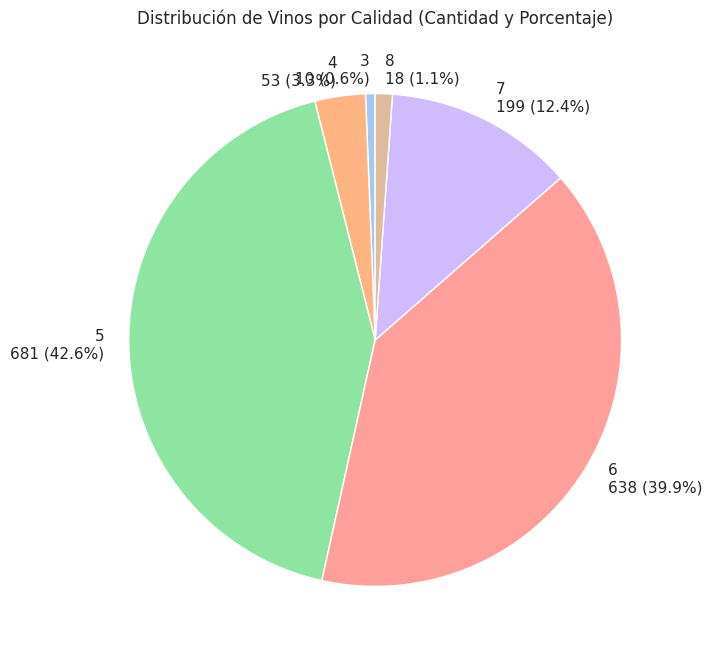

In [30]:
conteo_calidad = wine_data['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(conteo_calidad, labels=[f'{i}\n{val} ({val/sum(conteo_calidad):.1%})' for i, val in conteo_calidad.items()], startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Vinos por Calidad (Cantidad y Porcentaje)')
plt.show()



g. Un small múltiples de histogramas, separados por calidad.
Respuesta: Los vinos de alta calidad presentan una mayor diversidad en su contenido de alcohol, con una distribución amplia entre 10% y 12%, mientras que los vinos de baja calidad están más concentrados en un rango entre 9% y 10% de alcohol. Estas diferencias sugieren que el contenido de alcohol podría ser un factor relevante en la percepción de calidad del vino, con los vinos de mayor calidad siendo más diversos y posiblemente más complejos en cuanto a su composición.

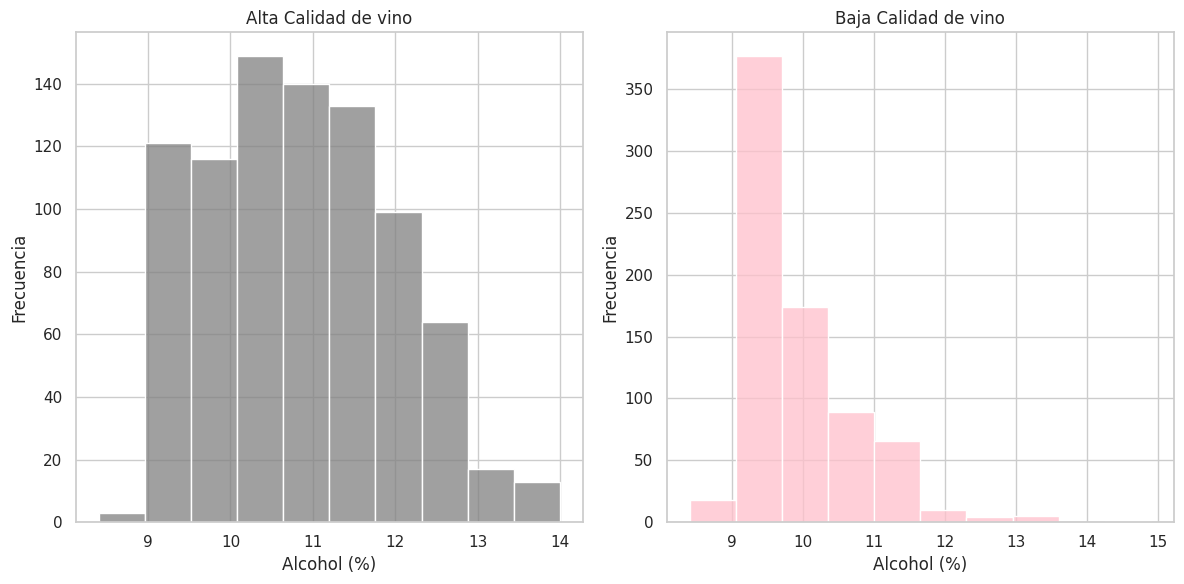

In [38]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(alta_calidad, bins=10, kde=False, color="grey", ax=axes[0])
axes[0].set_title('Alta Calidad de vino')
axes[0].set_xlabel('Alcohol (%)')
axes[0].set_ylabel('Frecuencia')

sns.histplot(baja_calidad, bins=10, kde=False, color="pink", ax=axes[1])
axes[1].set_title('Baja Calidad de vino')
axes[1].set_xlabel('Alcohol (%)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


h.	Un gráfico de violín donde se separe una columna en cuartiles y se grafique esta separación junto con la separación de vinos de buena y mala calidad (gráfico de violín con dos variables categóricas).
- Respuesta: De acuerdo al siguiente gráfico de violín podemos concluir que a medida que aumenta el contenido de alcohol en los cuartiles superiores (Q3 y Q4), los vinos de alta calidad muestran una mayor dispersión y variabilidad. Por lo que, el nivel de alcohol se asocia a la percepción sobre la calidad en el vino.

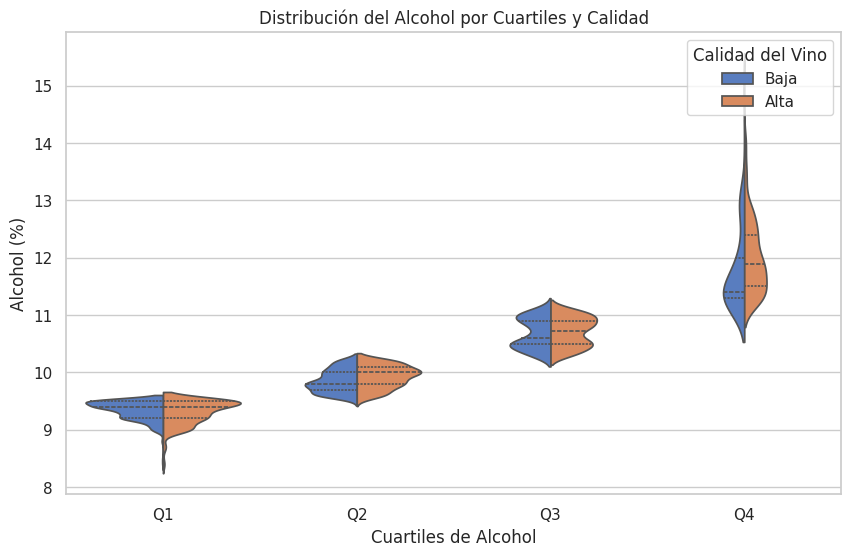

In [39]:
wine_data['alcohol_quartiles'] = pd.qcut(wine_data['alcohol'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

wine_data['quality_label'] = wine_data['quality'].apply(lambda x: 'Alta' if x > 5 else 'Baja')

plt.figure(figsize=(10, 6))
sns.violinplot(x='alcohol_quartiles', y='alcohol', hue='quality_label', data=wine_data, split=True, palette='muted', inner='quartile')
plt.title('Distribución del Alcohol por Cuartiles y Calidad')
plt.xlabel('Cuartiles de Alcohol')
plt.ylabel('Alcohol (%)')
plt.legend(title='Calidad del Vino')

plt.show()
